In [1]:
import pandas
import numpy as np
%matplotlib inline

## Series

In [2]:
series = pandas.Series(np.random.standard_normal(10))

In [3]:
series

0   -0.147897
1   -0.024298
2    1.146852
3   -1.451087
4    0.769449
5    0.868837
6    0.436505
7   -0.862551
8   -0.608355
9    1.115322
dtype: float64

In [4]:
series[4]

0.76944864698286897

In [5]:
series[1:4]

1   -0.024298
2    1.146852
3   -1.451087
dtype: float64

In [7]:
series.index

RangeIndex(start=0, stop=10, step=1)

In [9]:
series.index = list('abcdefghij')

In [10]:
list('abcdefghij')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [11]:
series['e']

0.76944864698286897

In [12]:
series['a' : 'f']

a   -0.147897
b   -0.024298
c    1.146852
d   -1.451087
e    0.769449
f    0.868837
dtype: float64

In [15]:
pandas.Series([1,2,3], index=['foo', 'bar', 'baz'])['foo']

1

In [16]:
pandas.Series({'a': 12, 'b': 42})

a    12
b    42
dtype: int64

In [17]:
series

a   -0.147897
b   -0.024298
c    1.146852
d   -1.451087
e    0.769449
f    0.868837
g    0.436505
h   -0.862551
i   -0.608355
j    1.115322
dtype: float64

In [18]:
series + 5

a    4.852103
b    4.975702
c    6.146852
d    3.548913
e    5.769449
f    5.868837
g    5.436505
h    4.137449
i    4.391645
j    6.115322
dtype: float64

In [19]:
series**2

a    0.021873
b    0.000590
c    1.315269
d    2.105654
e    0.592051
f    0.754878
g    0.190536
h    0.743994
i    0.370096
j    1.243944
dtype: float64

In [20]:
series + series

a   -0.295793
b   -0.048596
c    2.293703
d   -2.902174
e    1.538897
f    1.737675
g    0.873009
h   -1.725102
i   -1.216711
j    2.230644
dtype: float64

In [21]:
sum(series**2)

7.338886577859447

In [22]:
series + pandas.Series({'a': 2})

a    1.852103
b         NaN
c         NaN
d         NaN
e         NaN
f         NaN
g         NaN
h         NaN
i         NaN
j         NaN
dtype: float64

In [23]:
series + pandas.Series({'a': 2, 'c': 2})

a    1.852103
b         NaN
c    3.146852
d         NaN
e         NaN
f         NaN
g         NaN
h         NaN
i         NaN
j         NaN
dtype: float64

In [25]:
(series + pandas.Series({'a': 2, 'c': 2})).dropna()

a    1.852103
c    3.146852
dtype: float64

## Data Frames

In [26]:
fish = pandas.DataFrame({'size': [100, 120, 70],
                         'weight': [20, 30, 25]},
                        index = ['Brown Trout', 'Atlantic Salmon', 'Chinook Salmon'])

In [27]:
fish

,size,weight
Brown Trout,100,20
Atlantic Salmon,120,30
Chinook Salmon,70,25


In [28]:
fish.index

Index([u'Brown Trout', u'Atlantic Salmon', u'Chinook Salmon'], dtype='object')

In [30]:
fish.weight

Brown Trout        20
Atlantic Salmon    30
Chinook Salmon     25
Name: weight, dtype: int64

In [31]:
fish['size']

Brown Trout        100
Atlantic Salmon    120
Chinook Salmon      70
Name: size, dtype: int64

In [32]:
fish['size'] > 100

Brown Trout        False
Atlantic Salmon     True
Chinook Salmon     False
Name: size, dtype: bool

In [33]:
fish[fish['size'] > 100]

,size,weight
Atlantic Salmon,120,30


In [34]:
fish[fish['size'] > 100]['weight']

Atlantic Salmon    30
Name: weight, dtype: int64

## Reading

In [36]:
for i in dir(pandas):
    if i.startswith("read"):
        print i

read_clipboard
read_csv
read_excel
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table


In [37]:
df = pandas.read_csv('data/201508_trip_data.csv.gz')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 11 columns):
Trip ID            354152 non-null int64
Duration           354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null object
Start Terminal     354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null object
End Terminal       354152 non-null int64
Bike #             354152 non-null int64
Subscriber Type    354152 non-null object
Zip Code           353874 non-null object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


In [39]:
df.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,354152.000000,3.541520e+05,354152.000000,354152.000000,354152.000000
mean,676962.274416,1.046033e+03,58.446018,58.421816,422.957911
std,138874.153513,3.001694e+04,16.738860,16.876792,159.841550
min,432947.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,557009.750000,3.420000e+02,50.000000,50.000000,327.000000
50%,679451.500000,5.110000e+02,62.000000,63.000000,437.000000
75%,798026.250000,7.390000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


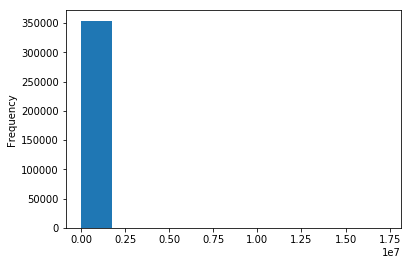

In [40]:
df['Duration'].plot.hist()

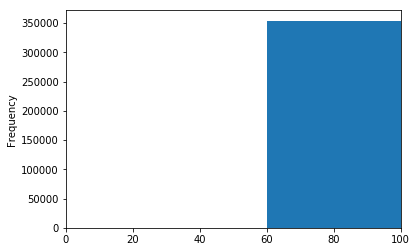

In [41]:
df['Duration'].plot.hist(xlim=(0,100))

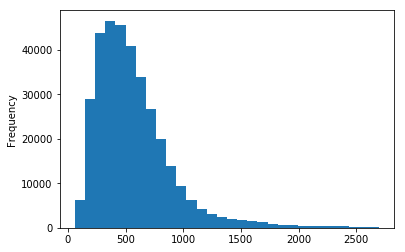

In [43]:
df[df['Duration'] < 60*45]['Duration'].plot.hist(bins=30)

In [44]:
df['Start Date'].head()

0    8/31/2015 23:26
1    8/31/2015 23:11
2    8/31/2015 23:13
3    8/31/2015 23:10
4    8/31/2015 23:09
Name: Start Date, dtype: object

In [47]:
import datetime
def mdy_hm(datetimestring):
    return datetime.datetime.strptime(datetimestring,
                            '%m/%d/%Y %H:%M')
df['Start Date'] = df['Start Date'].apply(mdy_hm) # element-wise

## Pivot / Stack

In [48]:
fish

,size,weight
Brown Trout,100,20
Atlantic Salmon,120,30
Chinook Salmon,70,25


In [49]:
fish.stack()

Brown Trout      size      100
                 weight     20
Atlantic Salmon  size      120
                 weight     30
Chinook Salmon   size       70
                 weight     25
dtype: int64

In [50]:
type(fish.stack())

pandas.core.series.Series

In [51]:
stacked = fish.stack().reset_index()

In [52]:
stacked

,level_0,level_1,0
0,Brown Trout,size,100
1,Brown Trout,weight,20
2,Atlantic Salmon,size,120
3,Atlantic Salmon,weight,30
4,Chinook Salmon,size,70
5,Chinook Salmon,weight,25


In [53]:
stacked.columns = ['name', 'info', 'value']

In [54]:
stacked

,name,info,value
0,Brown Trout,size,100
1,Brown Trout,weight,20
2,Atlantic Salmon,size,120
3,Atlantic Salmon,weight,30
4,Chinook Salmon,size,70
5,Chinook Salmon,weight,25


In [55]:
stacked.pivot(index='name', columns='info', values='value')

info,size,weight
name,,
Atlantic Salmon,120,30
Brown Trout,100,20
Chinook Salmon,70,25


In [56]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [57]:
stations = ['Embarcadero at Sansome',
 'Temporary Transbay Terminal (Howard at Beale)',
 'Harry Bridges Plaza (Ferry Building)',
 'San Francisco Caltrain 2 (330 Townsend)',
 'San Francisco Caltrain (Townsend at 4th)']
df = df[df['Start Station'].apply(lambda x: x in stations)]

In [58]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
7,913450,255,2015-08-31 22:16:00,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
10,913443,691,2015-08-31 21:49:00,Embarcadero at Sansome,60,8/31/2015 22:01,Market at Sansome,77,434,Subscriber,94109
14,913435,424,2015-08-31 21:25:00,Temporary Transbay Terminal (Howard at Beale),55,8/31/2015 21:33,San Francisco Caltrain 2 (330 Townsend),69,602,Subscriber,94401
15,913434,283,2015-08-31 21:19:00,San Francisco Caltrain 2 (330 Townsend),69,8/31/2015 21:24,Townsend at 7th,65,521,Subscriber,94107


In [59]:
departures = df[['Start Station', 'Start Date', 'Duration']]

In [60]:
departures.head()

,Start Station,Start Date,Duration
0,Harry Bridges Plaza (Ferry Building),2015-08-31 23:26:00,765
7,Embarcadero at Sansome,2015-08-31 22:16:00,255
10,Embarcadero at Sansome,2015-08-31 21:49:00,691
14,Temporary Transbay Terminal (Howard at Beale),2015-08-31 21:25:00,424
15,San Francisco Caltrain 2 (330 Townsend),2015-08-31 21:19:00,283


In [61]:
pivoted = departures.pivot_table(index='Start Date', columns='Start Station', values='Duration')

In [62]:
pivoted.head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-09-01 03:16:00,NaN,6712.0,NaN,NaN,NaN
2014-09-01 09:41:00,NaN,NaN,715.0,NaN,NaN
2014-09-01 09:42:00,NaN,NaN,NaN,601.0,NaN
2014-09-01 10:34:00,414.0,NaN,NaN,NaN,NaN
2014-09-01 10:37:00,949.0,NaN,NaN,NaN,NaN


## Time Series

In [64]:
daily_averages = pivoted.resample('1d').mean()

In [65]:
daily_averages.head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-09-01,4214.900000,2034.325000,3898.300000,5697.166667,527.333333
2014-09-02,776.712644,584.875000,602.343750,523.166667,515.843137
2014-09-03,848.012195,738.458333,611.924330,558.970270,523.452830
2014-09-04,737.666667,826.290000,1008.146474,628.082051,598.083333
2014-09-05,1005.341463,1040.880435,760.353554,602.419497,580.854167


In [67]:
daily_averages['2014'].head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-09-01,4214.900000,2034.325000,3898.300000,5697.166667,527.333333
2014-09-02,776.712644,584.875000,602.343750,523.166667,515.843137
2014-09-03,848.012195,738.458333,611.924330,558.970270,523.452830
2014-09-04,737.666667,826.290000,1008.146474,628.082051,598.083333
2014-09-05,1005.341463,1040.880435,760.353554,602.419497,580.854167


In [68]:
daily_averages['2014-10'].head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-10-01,2017.562500,1729.528846,747.191213,566.573837,501.398693
2014-10-02,1492.860000,1199.160000,653.659722,555.023663,716.618644
2014-10-03,816.750000,679.900000,696.092342,559.867150,493.988095
2014-10-04,2209.200000,2226.096774,940.470588,610.000000,637.250000
2014-10-05,2741.527778,5852.772727,623.083333,1455.153846,3377.000000


In [69]:
daily_averages['2014-10-2':'2014-10-7'].head()

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Start Date,,,,,
2014-10-02,1492.860000,1199.160000,653.659722,555.023663,716.618644
2014-10-03,816.750000,679.900000,696.092342,559.867150,493.988095
2014-10-04,2209.200000,2226.096774,940.470588,610.000000,637.250000
2014-10-05,2741.527778,5852.772727,623.083333,1455.153846,3377.000000
2014-10-06,926.086957,659.940476,633.525974,683.711812,546.141304


## Groupby

In [70]:
groupby_example = pandas.DataFrame({'key': ['a', 'b', 'a', 'b'],
                                    'value': [1,2,1,2]})

In [71]:
groupby_example

,key,value
0,a,1
1,b,2
2,a,1
3,b,2


In [72]:
groupby_example.groupby('key').sum()

,value
key,
a,2
b,4


In [75]:
daily_averages['Weekday'] = daily_averages.index.weekday

In [76]:
mean_weekday = daily_averages.groupby('Weekday').mean()

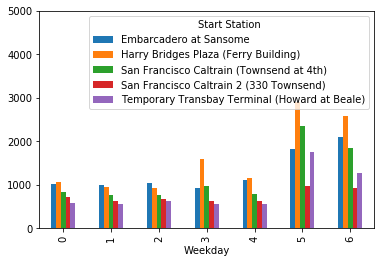

In [80]:
mean_weekday.plot(kind='bar', ylim=(0, 5000))

In [81]:
import calendar

In [82]:
daily_averages['Weekday'] = daily_averages['Weekday'].apply(lambda x: calendar.day_abbr[x])

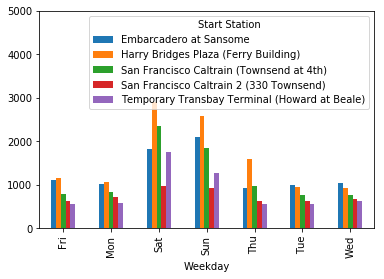

In [84]:
mean_weekday = daily_averages.groupby('Weekday').mean()
mean_weekday.plot(kind='bar', ylim=(0, 5000))

In [87]:
mean_weekday['Embarcadero at Sansome']

Weekday
Fri    1117.825299
Mon    1028.033459
Sat    1818.528534
Sun    2112.678439
Thu     922.983051
Tue     988.094777
Wed    1036.419716
Name: Embarcadero at Sansome, dtype: float64

In [91]:
mean_weekday.iloc[[1,3]]

Start Station,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale)
Weekday,,,,,
Mon,1028.033459,1073.037941,827.645853,730.183865,578.462879
Sun,2112.678439,2591.564937,1838.451324,924.354415,1269.035737


In [92]:
daily_averages['Month'] = daily_averages.index.month

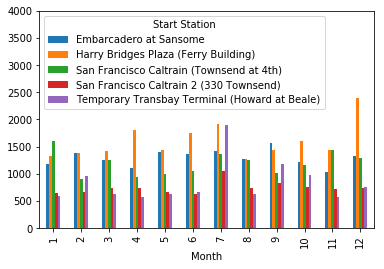

In [95]:
daily_averages.groupby('Month').mean().plot.bar(ylim=(0, 4000))